In [23]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from  pandas_datareader import data as wb
import pandas as pd
plt.style.use('fivethirtyeight')

In [24]:
 def VAR(position,sigma,Quantile):
        return position*sigma*scipy.stats.norm.ppf(Quantile)

In [25]:
VAR(100000,.08,.90)

10252.412524356803

In [55]:
data = ['NIO','TSLA','GE']
l = wb.DataReader(data, data_source = 'yahoo',start= '2020-01-01')['Adj Close']

In [56]:
l = pd.DataFrame(l)

In [57]:
l.tail()

Symbols,GE,NIO,TSLA
Date,,,
2021-01-15,11.33,56.270000,826.159973
2021-01-19,11.43,58.439999,844.549988
2021-01-20,11.39,57.709999,850.450012
2021-01-21,11.07,58.340000,844.989990
2021-01-22,11.11,61.950001,846.640015


In [58]:
returns = np.log(l/l.shift(1))

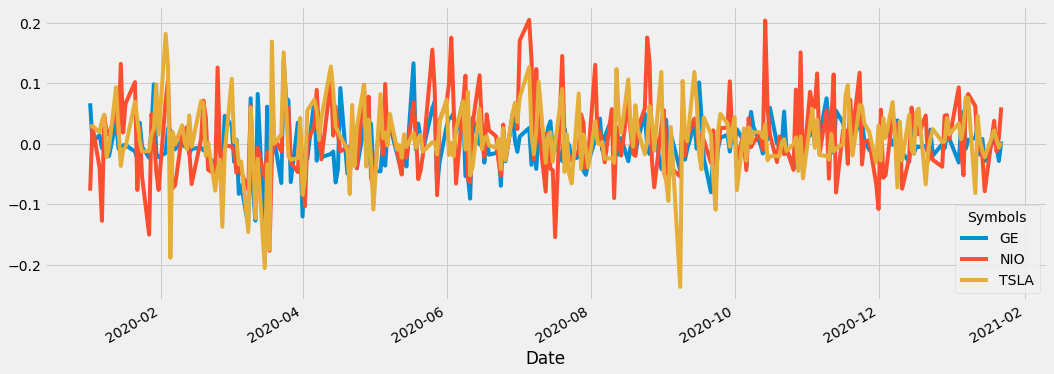

In [59]:
returns.plot(figsize=(16,6))

In [60]:
sd = returns.std()

In [61]:
position = l.iloc[-1]*500

In [62]:
position

Symbols
GE        5554.999828
NIO      30975.000381
TSLA    423320.007324
Name: 2021-01-22 00:00:00, dtype: float64

In [70]:
var_p = []
for i in range(len(position)):
    var_p.append(VAR(position[i],sd[i],0.95))
    

In [83]:
var_portfolio = np.array(var_p)

In [84]:
returns.corr()

Symbols,GE,NIO,TSLA
Symbols,,,
GE,1.000000,0.233790,0.258564
NIO,0.233790,1.000000,0.396672
TSLA,0.258564,0.396672,1.000000


In [85]:
np.dot(np.dot(var_portfolio,returns.corr()),var_portfolio)**.5

54717.84160893079